In [1]:
#!pip install ShopifyAPI

  Running setup.py bdist_wheel for ShopifyAPI ... - \ done
  Stored in directory: /Users/zober/Library/Caches/pip/wheels/3c/e1/69/12fc8c525f6ef43ccff7a83ee55329a7fafcc634043d2e1603
  Running setup.py bdist_wheel for pyactiveresource ... - done
  Stored in directory: /Users/zober/Library/Caches/pip/wheels/bf/a9/f1/01e06e128c15ec328b6d583c8ee74557eb045b0998bec4fc79
Successfully built ShopifyAPI pyactiveresource


In [2]:
import shopify
import requests
import re
import json
import pandas as pd
from pandas.io.json import json_normalize
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

%matplotlib inline

In [3]:
API_KEY = "f4678273f6be2f7ce7d4e67b8173ce5b"
PASSWORD = "471d7b85e1ef2153d0892f934340fb6e"
shop_url = "https://%s:%s@boxfox.myshopify.com/admin/" % (API_KEY, PASSWORD)
shopify.ShopifyResource.set_site(shop_url)

### Create Products Table

In [7]:
#functions to return list of ids for each page in API response

def get_product_ids(page):
    product_ids = []
    for p in shopify.Product.find(page=page):
        product_ids.append(p.get_id())
    return product_ids

def get_customer_ids(page):
    customer_ids = []
    for c in shopify.Customer.find(page=page):
        customer_ids.append(c.get_id())
    return customer_ids

def get_order_ids(page):
    order_ids = []
    for o in shopify.Order.find(page=page):
        order_ids.append(o.get_id())
    return order_ids

In [8]:

###Shopify API Pagination at 50 per request
pages = shopify.Product.count() // 50

prod_id = []
desc = []
title = []
date_created = []
vendor = []
price = []
prod_type = []
inv_qty = []
old_inv_qty = []
fulfillment = []

for page in range(87, pages + 1):
    product_ids = get_product_ids(page)
    for id_ in product_ids:
        time.sleep(1)
        prod = shopify.Product.get(id_)
        prod_id.append(id_)
        desc.append(prod['body_html'])
        vendor.append(prod['vendor'])
        price.append(prod['variants'][0]['price'])
        inv_qty.append(prod['variants'][0]['inventory_quantity'])
        old_inv_qty.append(prod['variants'][0]['old_inventory_quantity'])
        fulfillment.append(prod['variants'][0]['fulfillment_service'])
        date_created.append(prod['created_at'])
        title.append(prod['title'])
        prod_type.append(prod['product_type'])

KeyboardInterrupt: 

In [40]:
products = pd.DataFrame({'prod_id': prod_id,
             'desc': desc,
             'title': title,
             'date_created': date_created,
             'vendor': vendor,
             'price': price,
             'prod_type': prod_type,
             'inv_qty': inv_qty,
             'old_inv_qty': old_inv_qty,
             'fulfillment': fulfillment}
            )

products.head(3)
products.to_csv('products.csv', encoding = 'utf-8')

### Create Customers Table

In [5]:
shopify.Customer.get('5944854220')['created_at']

u'2017-03-20T15:37:09-07:00'

In [13]:
page

87

In [14]:
pages = shopify.Customer.count() // 50

# cust_id = []
# accepts_marketing = []
# user_since = []
# zip_code = []
# state = []
# total_orders = []
# total_spent = []
# state = []

for page in range(87, pages + 1):
    customer_ids = get_customer_ids(page)
    for id_ in customer_ids:
        cust = cust_id.append(id_)
        time.sleep(.5)
        cust = shopify.Customer.get(id_)
        accepts_marketing.append(cust['accepts_marketing'])
        user_since.append(cust['created_at'])
        total_orders.append(cust['orders_count'])
        total_spent.append(cust['total_spent'])
        if 'default_address' in cust.keys():
            address = cust['default_address']
            zip_code.append(address['zip'])
            state.append(address['province_code'])
        else:
            zip_code.append(np.nan)
            state.append(np.nan)

In [47]:
cust_id[0]
user_since[0]

u'2017-03-30T11:30:35-07:00'

In [48]:
shopify.Customer.get('5954703820')

{u'accepts_marketing': False,
 u'addresses': [{u'address1': u'620 Magnolia Ave. ',
   u'address2': u'',
   u'city': u'Pasadena ',
   u'company': u'Chateau de Pilmer',
   u'country': u'United States',
   u'country_code': u'US',
   u'country_name': u'United States',
   u'default': True,
   u'first_name': u'Susie ',
   u'id': 6259481804,
   u'last_name': u'Pilmer',
   u'name': u'Susie  Pilmer',
   u'phone': u'',
   u'province': u'California',
   u'province_code': u'CA',
   u'zip': u'91106'}],
 u'created_at': u'2017-03-21T10:48:09-07:00',
 u'default_address': {u'address1': u'620 Magnolia Ave. ',
  u'address2': u'',
  u'city': u'Pasadena ',
  u'company': u'Chateau de Pilmer',
  u'country': u'United States',
  u'country_code': u'US',
  u'country_name': u'United States',
  u'default': True,
  u'first_name': u'Susie ',
  u'id': 6259481804,
  u'last_name': u'Pilmer',
  u'name': u'Susie  Pilmer',
  u'phone': u'',
  u'province': u'California',
  u'province_code': u'CA',
  u'zip': u'91106'},
 u'em

In [15]:
customers = pd.DataFrame({'cust_id': cust_id,
                        'accepts_marketing': accepts_marketing,
                        'user_since': user_since,
                         'zip': zip_code,
                         'state': state,
                         'total_orders': total_orders,
                         'total_spent': total_spent}
                        )

customers.head(3)

ValueError: arrays must all be same length

In [74]:
#customers.to_csv('customers.csv', encoding = 'utf-8')

9650

In [16]:
customers.info()

NameError: name 'customers' is not defined

### Create Orders

In [49]:
#shopify.Checkout('13907384204')

In [99]:
pages = shopify.Order.count() // 50

accepts_marketing = []


In [125]:
for page in range(1, pages + 1):
    order_ids = get_order_ids(page)
    for id_ in order_ids:
        time.sleep(.5)
        order = shopify.Order.get(id_)
        order_df = json_normalize(order)
        orders = pd.concat([orders, order_df])

In [126]:
orders.head()

,billing_address.address1,billing_address.address2,billing_address.city,billing_address.company,billing_address.country,billing_address.country_code,billing_address.first_name,billing_address.last_name,billing_address.latitude,billing_address.longitude,...,test,token,total_discounts,total_line_items_price,total_price,total_price_usd,total_tax,total_weight,updated_at,user_id
0,620 Magnolia Ave.,,Pasadena,Chateau de Pilmer,United States,US,Susie,Pilmer,34.1352,-118.144,...,False,af8a143ff88c77a90a58b447d4f62429,0.00,89.50,117.93,117.93,7.83,2268,2017-03-21T11:20:07-07:00,None
0,2580 Armacost Ave,,Los Angeles,,United States,US,Gina,Binder,34.0257,-118.446,...,False,00bd07f118aa4dc8b26544e1e88fe6de,0.00,70.00,96.73,96.73,6.13,2268,2017-03-21T11:17:44-07:00,None
0,15905 28th Drive SE,,Mill Creek,,United States,US,Ashley,Walton,47.8538,-122.194,...,False,1400bc73f57db029b0d4f95e789de7f7,0.00,65.00,76.00,76.00,0.00,2268,2017-03-21T10:22:49-07:00,None
0,"702 harrison st, suite a",,berkeley,,United States,US,rhiannon,smith,37.8803,-122.305,...,False,2c76bb7f669eed92af8c37e9831236a4,0.00,56.00,71.06,71.06,4.06,2268,2017-03-21T10:10:26-07:00,None
0,4 Smoky Lane,,Westport,,United States,US,Samantha,Smolka,41.1298,-73.3439,...,False,cbb50d0d631a8225f366e62296483613,0.00,65.50,76.50,76.50,0.00,2268,2017-03-21T09:18:44-07:00,None


In [128]:
#orders.to_csv('orders.csv', encoding= 'utf-8')

In [129]:
for c in orders.columns:
    print(c)

billing_address.address1
billing_address.address2
billing_address.city
billing_address.company
billing_address.country
billing_address.country_code
billing_address.first_name
billing_address.last_name
billing_address.latitude
billing_address.longitude
billing_address.name
billing_address.phone
billing_address.province
billing_address.province_code
billing_address.zip
browser_ip
buyer_accepts_marketing
cancel_reason
cancelled_at
cart_token
checkout_id
checkout_token
client_details.accept_language
client_details.browser_height
client_details.browser_ip
client_details.browser_width
client_details.session_hash
client_details.user_agent
closed_at
confirmed
contact_email
created_at
currency
customer.accepts_marketing
customer.created_at
customer.default_address.address1
customer.default_address.address2
customer.default_address.city
customer.default_address.company
customer.default_address.country
customer.default_address.country_code
customer.default_address.country_name
customer.default_ad

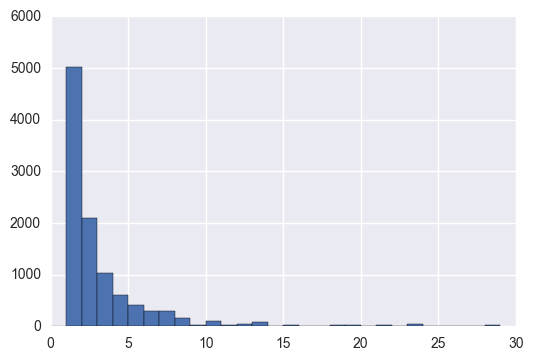

In [173]:

plt.hist(orders.fillna(0)['customer.orders_count'].astype('int'), bins=29);erika618

#orders['customer.orders_count'].value_counts()

In [200]:
shopify.Order.get('5399964044')['line_items'][0].keys()

[u'requires_shipping',
 u'variant_id',
 u'id',
 u'product_exists',
 u'sku',
 u'title',
 u'origin_location',
 u'fulfillment_service',
 u'total_discount',
 u'variant_title',
 u'vendor',
 u'tax_lines',
 u'price',
 u'taxable',
 u'properties',
 u'name',
 u'fulfillable_quantity',
 u'grams',
 u'gift_card',
 u'fulfillment_status',
 u'product_id',
 u'variant_inventory_management',
 u'destination_location',
 u'quantity']

In [13]:
item = shopify.Product.get('9809658508')
item

{u'body_html': u"<p>A hand wrapped, custom built gift box that includes a personalized card and the following contents:</p><p>\xa0\xa0<strong>1</strong> \xd7 AEnon's // Black Lava Bath Salt</p><p>\xa0\xa0<strong>1</strong> \xd7 Black Pashmina</p><p>\xa0\xa0<strong>1</strong> \xd7 Le Pens // Hot Pink</p><p>\xa0\xa0<strong>1</strong> \xd7 Voluspa // Prosecco Rose 2 Wick Tin</p>",
 u'created_at': u'2017-03-01T07:32:42-08:00',
 u'handle': u'custom-boxfox-17841',
 u'id': 9809658508,
 u'image': {u'created_at': u'2017-03-01T07:32:44-08:00',
  u'id': 22716529228,
  u'position': 1,
  u'product_id': 9809658508,
  u'src': u'https://cdn.shopify.com/s/files/1/0558/2845/products/IMG_0460_Cropped_89931371-81a5-4cad-95ab-e3c7fea235e5.jpg?v=1488382364',
  u'updated_at': u'2017-03-01T07:32:44-08:00',
  u'variant_ids': []},
 u'images': [{u'created_at': u'2017-03-01T07:32:44-08:00',
   u'id': 22716529228,
   u'position': 1,
   u'product_id': 9809658508,
   u'src': u'https://cdn.shopify.com/s/files/1/0558/

In [16]:
item['variants'][0]

{u'barcode': None,
 u'compare_at_price': None,
 u'created_at': u'2017-03-01T07:32:44-08:00',
 u'fulfillment_service': u'manual',
 u'grams': 454,
 u'id': 35070376780,
 u'image_id': None,
 u'inventory_management': None,
 u'inventory_policy': u'deny',
 u'inventory_quantity': 1,
 u'old_inventory_quantity': 1,
 u'option1': u"You're a Fox",
 u'option2': None,
 u'option3': None,
 u'position': 1,
 u'price': u'65.00',
 u'product_id': 9809658508,
 u'requires_shipping': True,
 u'sku': u'',
 u'taxable': True,
 u'title': u"You're a Fox",
 u'updated_at': u'2017-03-01T07:32:44-08:00',
 u'weight': 1.0,
 u'weight_unit': u'lb'}

In [17]:
item['variants'][10]

{u'barcode': None,
 u'compare_at_price': None,
 u'created_at': u'2017-03-01T07:32:44-08:00',
 u'fulfillment_service': u'manual',
 u'grams': 454,
 u'id': 35070378252,
 u'image_id': None,
 u'inventory_management': None,
 u'inventory_policy': u'deny',
 u'inventory_quantity': 1,
 u'old_inventory_quantity': 1,
 u'option1': u'Thinking Of You',
 u'option2': None,
 u'option3': None,
 u'position': 11,
 u'price': u'65.00',
 u'product_id': 9809658508,
 u'requires_shipping': True,
 u'sku': u'',
 u'taxable': True,
 u'title': u'Thinking Of You',
 u'updated_at': u'2017-03-01T07:32:44-08:00',
 u'weight': 1.0,
 u'weight_unit': u'lb'}